In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Datasets/MovieLens/new/u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
movie_titles = pd.read_csv(r'../Datasets/MovieLens/new/Movie_Id_Titles')

In [12]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df = pd.merge(df,movie_titles,on='item_id')

In [14]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [15]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [17]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()

In [19]:
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

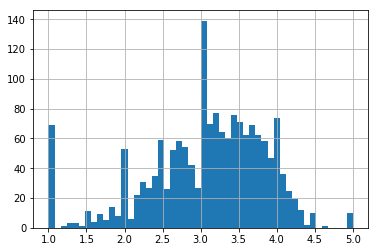

In [22]:
ratings['rating'].hist(bins=50)

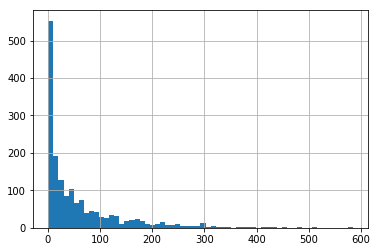

In [23]:
ratings['number_of_ratings'].hist(bins=60)

<p>Checking relationship between <b>rating of a movie</b> and the <b>number of ratings</b> using <i>Seaborn's</i> <b>jointplot()</b> function.</p>

In [24]:
import seaborn as sns

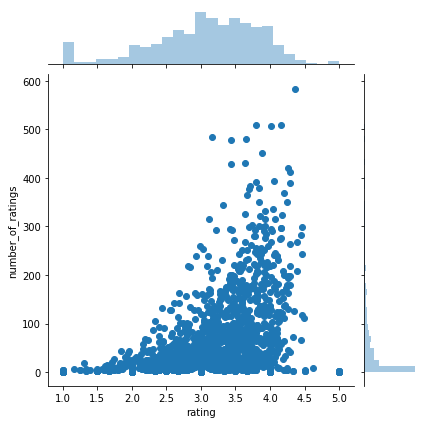

In [25]:
sns.jointplot(x='rating',y='number_of_ratings',data=ratings)

<i>The graph indicates that the more the ratings a movie gets the higher the average rating it gets.</i>

In [26]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

In [27]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p>Using <i><b>'ascending=false'</b></i> of <b><i>'sort_values'</i></b> function to find out top 10 movies.</p>

In [28]:
ratings.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [29]:
SW_user_rating = movie_matrix['Star Wars (1977)']
TS_user_rating = movie_matrix['Toy Story (1995)']

In [31]:
SW_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [32]:
TS_user_rating.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

<p>Using 'corwith' function of Pandas to find correlation between two dataframes (the movies).</p>

In [33]:
similar_to_SW = movie_matrix.corrwith(SW_user_rating)

In [34]:
similar_to_SW.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [35]:
similar_to_TS = movie_matrix.corrwith(TS_user_rating)

In [36]:
similar_to_TS.head()

title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

In [37]:
corr_TS = pd.DataFrame(similar_to_TS,columns=['Correlation'])

In [38]:
corr_TS.dropna(inplace=True)

In [39]:
corr_TS.head()

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


In [40]:
corr_SW = pd.DataFrame(similar_to_SW,columns=['Correlation'])

In [41]:
corr_SW.dropna(inplace=True)

In [42]:
corr_SW.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [43]:
corr_SW = corr_SW.join(ratings['number_of_ratings'])
corr_TS = corr_TS.join(ratings['number_of_ratings'])

In [44]:
corr_SW.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [46]:
corr_SW[corr_SW['number_of_ratings']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [47]:
corr_TS[corr_TS['number_of_ratings']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


In [48]:
RLA_user_rating = movie_matrix['Raiders of the Lost Ark (1981)']

In [49]:
similar_to_RLA = movie_matrix.corrwith(RLA_user_rating)

In [50]:
corr_RLA = pd.DataFrame(similar_to_RLA,columns=['Correlation'])

In [51]:
corr_RLA.dropna(inplace=True)

In [52]:
corr_RLA = corr_RLA.join(ratings['number_of_ratings'])

In [53]:
corr_RLA.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.975900,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.091254,109
12 Angry Men (1957),0.129334,125
187 (1997),0.230769,41


In [54]:
corr_RLA[corr_RLA['number_of_ratings']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Raiders of the Lost Ark (1981),1.000000,420
Indiana Jones and the Last Crusade (1989),0.539606,331
"Empire Strikes Back, The (1980)",0.538659,368
Star Wars (1977),0.536117,584
Back to the Future (1985),0.506807,350
"Firm, The (1993)",0.490823,151
Return of the Jedi (1983),0.467391,507
Braveheart (1995),0.458854,297
Field of Dreams (1989),0.424938,212
